# Scraped Lineups API Example

## Run this example in [Colab](https://colab.research.google.com/github/SignalOceanSdk/SignalSDK/blob/master/docs/examples/jupyter/ScrapedLineupsAPI/Scraped%20Lineups%20API%20Example.ipynb)

Get your personal Signal Ocean API subscription key (acquired [here](https://apis.signalocean.com/profile)) and replace it below:

In [1]:
signal_ocean_api_key = '' # Replace with your subscription key

# Scraped Lineups API

The goal of Scraped Lineups API is to collect and return scraped lineups by the given filters or lineup IDs. This can be done by using the `ScrapedLineupsAPI` class and calling appropriate methods


#### 1. Request by filters

Lineups can be retrieved for specific filters, by calling the `get_lineups` method with the following arguments:

#### Required

`vessel_type` The vessel type

_Additionally, at least one of the following is required_

`imos` List of IMOs

`received_date_from` Earliest date the lineup received

`received_date_to` Latest date the lineup received

`updated_date_from` Earliest date the lineup updated

`updated_date_to` Latest date the lineup updated

> Mixing received and updated dates is not allowed

> It's highly recommended to use UTC  dates, since this is the internally used format


#### 2. Request by lineup IDs

Lineups can be retrieved for specific lineup IDs, by calling the `get_lineups_by_lineup_ids` method with the following argument:

#### Required

`lineup_ids` A list of lineup ids to retrieve

### Additional optional arguments

Both methods, also accept the following optional arguments:

`include_details` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
parsed_part_id, line_from, line_to, in_line_order, source
```

`include_scraped_fields` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
scraped_vessel_name, scraped_imo, scraped_deadweight, scraped_year_built, scraped_eta, scraped_etb, scraped_etd, scraped_location, scraped_quantity, scraped_cargo_type, scraped_api_gravity, scraped_origin, scraped_destination, scraped_supplier, scraped_charterer, scraped_buyer, scraped_port_agent
```

`include_vessel_details` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
vessel_name, deadweight, year_built, liquid_capacity, vessel_type_id, vessel_type, vessel_class, commercial_operator_id, commercial_operator
```

`include_labels` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
location_name, location_taxonomy, operation_type, cargo_type, cargo_group, origin_name, origin_taxonomy, destination_name, destination_taxonomy, supplier, charterer, buyer, port_agent, vessel_status
```

`include_content` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
content, subject
```

`include_sender` If this field is `True` the following columns will be included in the response (otherwise they will be `None`): 
```
sender
```

`include_debug_info` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
is_private
```

> Default value is `True` for the arguments described above 

## Installation

To install _Signal Ocean SDK_, simply run the following command

In [2]:
%%capture
%pip install signal-ocean

## Quickstart

Import `signal-ocean` and other modules required for this demo

In [3]:
from signal_ocean import Connection
from signal_ocean.scraped_lineups import ScrapedLineupsAPI

from datetime import datetime, timedelta
import pandas as pd
import plotly.graph_objects as go

Create a new instance of the `ScrapedLineupsAPI` class

In [4]:
connection = Connection(signal_ocean_api_key)
api = ScrapedLineupsAPI(connection)

Now you are ready to retrieve your data

#### Request by date

To get all tanker lineups received the last twelve hours, you must declare appropriate `vessel_type` and `received_date_from` variables

In [5]:
vessel_type = 1  # Tanker
received_date_from = datetime.utcnow() - timedelta(hours=12)

And then call `get_lineups` method, as below

In [6]:
scraped_lineups = api.get_lineups(
    vessel_type = vessel_type,
    received_date_from = received_date_from,
)

next(iter(scraped_lineups), None)

ScrapedLineup(lineup_id=8370319, message_id=30888047, parsed_part_id=45873939, line_from=16, line_to=16, in_line_order=None, source='Email', updated_date=datetime.datetime(2022, 11, 21, 8, 3, 32, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2022, 11, 21, 8, 0, 18, tzinfo=datetime.timezone.utc), is_deleted=False, scraped_vessel_name='MYKLEBUST', scraped_imo=None, scraped_deadweight=None, scraped_year_built=None, imo=-1, vessel_name=None, deadweight=None, year_built=None, liquid_capacity=None, vessel_type_id=-1, vessel_type='Unknown', vessel_class_id=-1, vessel_class='Unknown', commercial_operator_id=None, commercial_operator=None, scraped_eta='2022-11-23 16:00:00', eta=datetime.datetime(2022, 11, 23, 0, 0, tzinfo=datetime.timezone.utc), scraped_etb=None, etb=None, scraped_etd=None, etd=None, scraped_location='Milford Haven', location_geo_id=16315, location_name='Milford Haven', location_taxonomy_id=2, location_taxonomy='Port', operation_type_id=None, operation_type=Non

For better visualization, it's convenient to insert data into a DataFrame

In [7]:
df = pd.DataFrame(scraped_lineups)

df.head()

,lineup_id,message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,is_deleted,...,buyer,scraped_port_agent,port_agent_id,port_agent,vessel_status_id,vessel_status,content,subject,sender,is_private
0,8370319,30888047,45873939,16,16,NaN,Email,2022-11-21 08:03:32+00:00,2022-11-21 08:00:18+00:00,False,...,None,GAC,-1.0,None,NaN,None,14\t2022-11-23 16:00:00\tMYKLEBUST\tLPG Tanker...,SignalWebScraperBot - Milford Haven - 2022-11-...,Signal Maritime,True
1,8370320,30888047,45873939,19,19,NaN,Email,2022-11-21 08:03:32+00:00,2022-11-21 08:00:18+00:00,False,...,None,Graypen,-1.0,None,NaN,None,17\t2022-11-24 06:00:00\tADAMASTOS\tLNG Tanker...,SignalWebScraperBot - Milford Haven - 2022-11-...,Signal Maritime,True
2,8370321,30888047,45873939,4,4,NaN,Email,2022-11-21 08:03:32+00:00,2022-11-21 08:00:18+00:00,False,...,None,Inchcape Shipping Services,714.0,Inchcape,NaN,None,2\t2022-11-21 18:01:00\tTRAIANO KNUTSEN\tLNG T...,SignalWebScraperBot - Milford Haven - 2022-11-...,Signal Maritime,True
3,8370322,30888047,45873939,15,15,NaN,Email,2022-11-21 08:03:32+00:00,2022-11-21 08:00:18+00:00,False,...,None,Graypen,-1.0,None,NaN,None,13\t2022-11-23 08:00:00\tTHUN GRANITE\tOil Pro...,SignalWebScraperBot - Milford Haven - 2022-11-...,Signal Maritime,True
4,8370323,30888047,45873939,18,18,NaN,Email,2022-11-21 08:03:32+00:00,2022-11-21 08:00:18+00:00,False,...,None,Graypen,-1.0,None,NaN,None,16\t2022-11-24 04:00:00\tSTRYMON\tCrude Oil Ta...,SignalWebScraperBot - Milford Haven - 2022-11-...,Signal Maritime,True


#### Request by IMOs

To get lineups for specific vessel(s) by their IMO number(s), you can simple call the `get_lineups` method for a list of desired IMO(s)

Adding some date argument is always feasible

In [8]:
imos = [9389100, 9399492, 9683013, 9370848, 9420617]  # Or add a list of your desired IMOs

scraped_lineups_by_imos = api.get_lineups(
    vessel_type=vessel_type,
    received_date_from=received_date_from,
    imos=imos,
)

df_by_imos = pd.DataFrame(scraped_lineups_by_imos)
df_by_imos.head()

,lineup_id,message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,is_deleted,...,buyer,scraped_port_agent,port_agent_id,port_agent,vessel_status_id,vessel_status,content,subject,sender,is_private
0,8372050,30897502,45880326,92,92,None,Email,2022-11-21 09:06:48+00:00,2022-11-21 09:04:12+00:00,False,...,BP,None,None,None,3,AtAnchor,"KMARIN RENOWN 600,000 BP GRE...",Baku-Tblisi-Ceyhan Pipeline Report for Ceyhan ...,Boutros Maritime & Transports,True
1,8372056,30897502,45880326,68,68,None,Email,2022-11-21 09:06:48+00:00,2022-11-21 09:04:12+00:00,False,...,Socar,None,None,None,5,Sailed,"ANAFI WARRIOR 682,910 SOCAR ITA...",Baku-Tblisi-Ceyhan Pipeline Report for Ceyhan ...,Boutros Maritime & Transports,True
2,8372061,30897502,45880326,67,67,None,Email,2022-11-21 09:06:48+00:00,2022-11-21 09:04:12+00:00,False,...,Socar,None,None,None,5,Sailed,"KMARIN RENOWN 682,966 SOCAR ITA...",Baku-Tblisi-Ceyhan Pipeline Report for Ceyhan ...,Boutros Maritime & Transports,True
3,8372065,30897502,45880326,99,99,None,Email,2022-11-21 09:06:48+00:00,2022-11-21 09:04:12+00:00,False,...,BP,None,None,None,1,Expected,"SILVER 600,000 BP ...",Baku-Tblisi-Ceyhan Pipeline Report for Ceyhan ...,Boutros Maritime & Transports,True
4,8372076,30897502,45880326,81,81,None,Email,2022-11-21 09:06:48+00:00,2022-11-21 09:04:12+00:00,False,...,Socar,None,None,None,5,Sailed,"CASCADE SPIRIT 1,050,993 SOCAR TAI...",Baku-Tblisi-Ceyhan Pipeline Report for Ceyhan ...,Boutros Maritime & Transports,True


#### Request by lineup IDs

In the same manner, to get data for specific lineup ID(s), you must call the `get_lineups_by_lineup_ids` method for a list of desired lineup ID(s)

Date arguments are not available in this method

In [9]:
lineup_ids = [8326412, 8326413, 8326414, 8326415, 8326416]  # Or add a list of your desired lineup IDs

scraped_lineups_by_ids = api.get_lineups_by_lineup_ids(
    lineup_ids = lineup_ids,
)

df_by_ids = pd.DataFrame(scraped_lineups_by_ids)
df_by_ids.head()

,lineup_id,message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,is_deleted,...,buyer,scraped_port_agent,port_agent_id,port_agent,vessel_status_id,vessel_status,content,subject,sender,is_private
0,8326412,30832782,45822340,99,99,None,Email,2022-11-18 09:13:38+00:00,2022-11-18 06:41:04+00:00,False,...,Litasco,None,None,None,1,Expected,"OHIO 600,000 LITASCO ...",Baku-Tblisi-Ceyhan Pipeline Report for Ceyhan ...,Boutros Maritime & Transports,True
1,8326413,30832782,45822340,74,74,None,Email,2022-11-18 09:13:38+00:00,2022-11-18 06:41:04+00:00,False,...,Socar,None,None,None,5,Sailed,"SEAVOYAGER 1,050,710 SOCAR SPA...",Baku-Tblisi-Ceyhan Pipeline Report for Ceyhan ...,Boutros Maritime & Transports,True
2,8326414,30832782,45822340,78,78,None,Email,2022-11-18 09:13:38+00:00,2022-11-18 06:41:04+00:00,False,...,BP,None,None,None,5,Sailed,"GEMINI SUN 682,834 BP ITA...",Baku-Tblisi-Ceyhan Pipeline Report for Ceyhan ...,Boutros Maritime & Transports,True
3,8326415,30832782,45822340,73,73,None,Email,2022-11-18 09:13:38+00:00,2022-11-18 06:41:04+00:00,False,...,Socar,None,None,None,5,Sailed,"AEGEAN POWER 472,642 SOCAR TUN...",Baku-Tblisi-Ceyhan Pipeline Report for Ceyhan ...,Boutros Maritime & Transports,True
4,8326416,30832782,45822340,79,79,None,Email,2022-11-18 09:13:38+00:00,2022-11-18 06:41:04+00:00,False,...,ExxonMobil,None,None,None,5,Sailed,"NISSOS SERIFOS 650,343 EXXON ROM...",Baku-Tblisi-Ceyhan Pipeline Report for Ceyhan ...,Boutros Maritime & Transports,True


#### Usage of optional arguments

By default, all fields are returned. In many cases, it is convenient to select specific columns. For example, if we want to compare scraped and mapped fields

In [10]:
scraped_mapped_columns = [
    'scraped_vessel_name',
    'vessel_name',
    'scraped_location',
    'location_name',
    'scraped_origin',
    'origin_name',
    'scraped_cargo_type',
    'cargo_type',
    'scraped_quantity',
    'quantity',
]

scraped_mapped_df = pd.DataFrame(scraped_lineups, columns=scraped_mapped_columns)

scraped_mapped_df.head()

,scraped_vessel_name,vessel_name,scraped_location,location_name,scraped_origin,origin_name,scraped_cargo_type,cargo_type,scraped_quantity,quantity
0,MYKLEBUST,None,Milford Haven,Milford Haven,"Mongstad, Norway",Mongstad,None,None,26614,26614.0
1,ADAMASTOS,None,Milford Haven,Milford Haven,"Corpus Christi LNG Terminal, Texas, United Sta...",None,None,None,116581,116581.0
2,TRAIANO KNUTSEN,None,Milford Haven,Milford Haven,"Corpus Christi LNG Terminal, Texas, United Sta...",None,None,None,122261,122261.0
3,THUN GRANITE,Thun Granite,Milford Haven,Milford Haven,"Londonderry, United Kingdom",United Kingdom,None,None,4107,4107.0
4,STRYMON,Strymon,Milford Haven,Milford Haven,"TBA, Unknown",None,None,None,62717,62717.0


## Examples

Let's start by fetching all tanker lineups received the last week

In [11]:
example_vessel_type = 1  # Tanker
example_date_from = datetime.utcnow() - timedelta(days=7)

example_scraped_lineups = api.get_lineups(
   vessel_type=example_vessel_type,
   received_date_from=example_date_from,
)

#### Exclude deleted scraped lineups

The `is_deleted` property of a scraped lineup indicates whether it is valid or not. If it is set to `True`, the corresponding `lineup_id` has been replaced by a new one.

For the sake of completeness, we will exclude deleted scraped lineups in the following examples.

In [12]:
example_scraped_lineups = [lineup for lineup in example_scraped_lineups if not lineup.is_deleted]

next(iter(example_scraped_lineups), None)

ScrapedLineup(lineup_id=8231038, message_id=30653791, parsed_part_id=45668498, line_from=2, line_to=2, in_line_order=None, source='Email', updated_date=datetime.datetime(2022, 11, 15, 9, 4, 45, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2022, 11, 15, 0, 0, tzinfo=datetime.timezone.utc), is_deleted=False, scraped_vessel_name='SOFIA', scraped_imo=None, scraped_deadweight=None, scraped_year_built=None, imo=-1, vessel_name=None, deadweight=None, year_built=None, liquid_capacity=None, vessel_type_id=-1, vessel_type='Unknown', vessel_class_id=-1, vessel_class='Unknown', commercial_operator_id=None, commercial_operator=None, scraped_eta='2022-11-07 00:00:00', eta=datetime.datetime(2022, 11, 7, 0, 0, tzinfo=datetime.timezone.utc), scraped_etb='2022-11-14 00:00:00', etb=datetime.datetime(2022, 11, 14, 0, 0, tzinfo=datetime.timezone.utc), scraped_etd='2022-11-15 00:00:00', etd=datetime.datetime(2022, 11, 15, 0, 0, tzinfo=datetime.timezone.utc), scraped_location='TRIESTE', loc

Now, we are ready to insert our data into a dataframe and keep only specific fields

In [13]:
example_columns = [
    'imo',
    'location_name',   
    'operation_type',
    'eta',
    'quantity',
    'is_deleted'
]

data = pd.DataFrame(example_scraped_lineups, columns=example_columns).astype({'imo': 'Int64'})

data.head()

,imo,location_name,operation_type,eta,quantity,is_deleted
0,9411082,Trieste,Discharge,2022-12-01 00:00:00+00:00,100000.0,False
1,9765029,Trieste,Discharge,2022-11-22 00:00:00+00:00,98990.0,False
2,9777931,Trieste,Discharge,2022-11-20 00:00:00+00:00,97824.0,False
3,9429015,Trieste,Discharge,2022-11-17 00:00:00+00:00,131734.0,False
4,9413834,Trieste,Discharge,2022-11-12 00:00:00+00:00,79892.0,False


#### Top 10 Ports

In this example, we will find the top 10 Ports, based on the number of distinct operations

In [14]:
top_ports = data[data.operation_type.notna()]\
    [['location_name', 'imo', 'operation_type']]\
    .drop_duplicates()\
    .location_name\
    .value_counts()\
    .head(10)\
    .index\
    .tolist()

top_ports_df = data[data.location_name.isin(top_ports)]

top_ports_pivot = pd.pivot_table(
    top_ports_df,
    index='location_name',
    columns='operation_type',
    values='imo',
    aggfunc=lambda x: len(x.unique()),
    fill_value=0,
    dropna=False,
).reset_index().rename_axis(None, axis=1)

top_ports_pivot.index = top_ports_pivot.location_name

top_ports_pivot  = top_ports_pivot.loc[top_ports].reset_index(drop=True)
top_ports_pivot

,location_name,Discharge,Load,Unknown
0,Le Havre,136,0,1
1,Basrah,0,70,0
2,Sikka,24,23,0
3,Ceyhan,0,44,0
4,Trieste,16,0,0
5,Ningbo,15,0,0
6,Dongjiangkou,15,0,0
7,Rizhao - Lanshan,14,0,0
8,Fos,13,0,0
9,Mumbai,11,1,0


And display results in a stacked bar plot

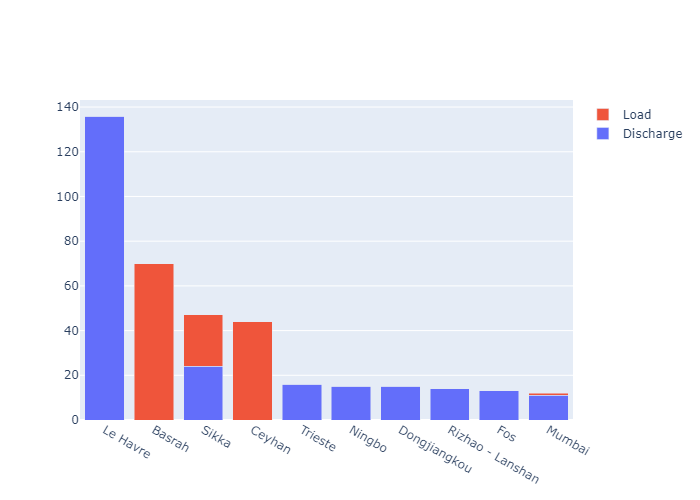

In [15]:
ports_list = top_ports_pivot.location_name.tolist()

disch_bar = 'Discharge' in top_ports_pivot and go.Bar(
    name='Discharge',
    x=ports_list,
    y=top_ports_pivot.Discharge.tolist(),
)
load_bar = 'Load' in top_ports_pivot and go.Bar(
    name='Load',
    x=ports_list,
    y=top_ports_pivot.Load.tolist(),
)
waypoint_bar = 'Waypoint' in top_ports_pivot and go.Bar(
    name='Waypoint',
    x=ports_list,
    y=top_ports_pivot.Waypoint.tolist(),
)
fig_data = list(filter(
    lambda x: x,
    [disch_bar, load_bar, waypoint_bar]
))

fig = go.Figure(data=fig_data)

fig.update_layout(barmode='stack')
fig.show()

#### Imported quantity in specific ports

In this example, we will create a visualization, for the total cargo quantity discharging in specifc ports per day over the next week

In [16]:
ports = data[data.operation_type == 'Discharge'][['imo', 'location_name']]\
    .drop_duplicates()\
    .location_name\
    .value_counts()\
    .head()\
    .index\
    .tolist()

this_week_days = pd.date_range(start=datetime.utcnow().date(), freq='D', periods=7, tz='UTC')

ports

['Le Havre', 'Sikka', 'Trieste', 'Dongjiangkou', 'Ningbo']

Create the pivot table

In [17]:
exports_mask = data.location_name.isin(ports) & (data.operation_type == 'Discharge')

df_exports = data[exports_mask][['eta', 'location_name', 'quantity', 'imo']].drop_duplicates()

df_pivot = pd\
    .pivot_table(
        df_exports,
        columns='location_name',
        index='eta',
        values='quantity',
        aggfunc=sum,
        fill_value=0,
    )\
    .reindex(index=this_week_days, fill_value=0)\
    .reset_index()\
    .rename(columns={'index': 'eta'})\
    .rename_axis(None, axis=1)

df_pivot

,eta,Dongjiangkou,Le Havre,Ningbo,Sikka,Trieste
0,2022-11-21 00:00:00+00:00,99974,0,260796,65000,369050
1,2022-11-22 00:00:00+00:00,0,150000,0,527349,553031
2,2022-11-23 00:00:00+00:00,132954,0,0,314262,132542
3,2022-11-24 00:00:00+00:00,133338,0,0,99447,196274
4,2022-11-25 00:00:00+00:00,99755,0,287195,0,0
5,2022-11-26 00:00:00+00:00,127772,0,0,0,0
6,2022-11-27 00:00:00+00:00,0,0,0,0,0


And display the results as timeseries

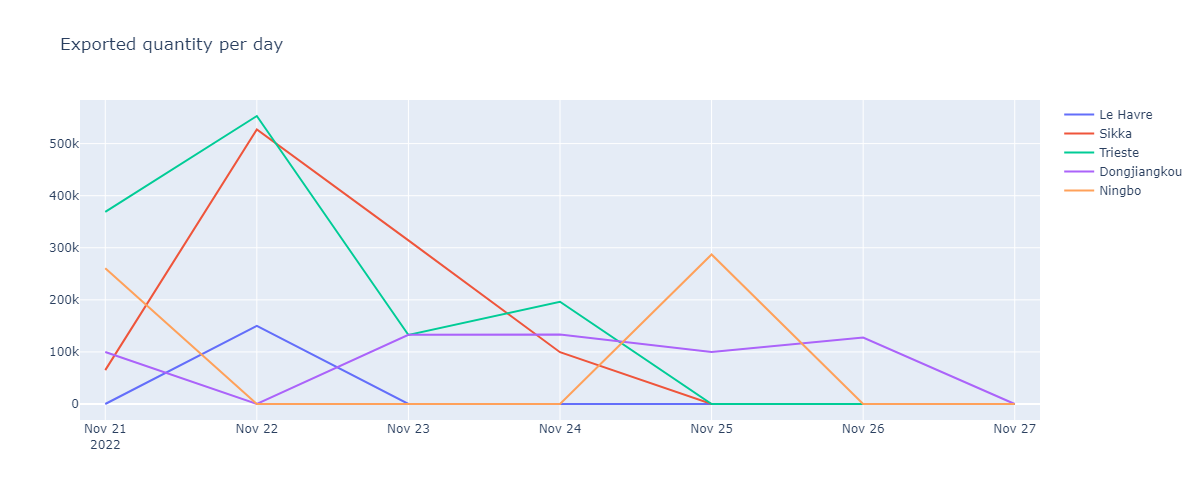

In [18]:
def port_button(port):
    args = [
        {'visible': [i == ports.index(port) for i in range(len(ports))]},
        {
            'title': f'Exported quantity in {port} per day',
            'showlegend': True
        },
    ]
    
    return dict(
        label=port,
        method='update',
        args=args,
    )

title = 'Exported quantity per day'
today = datetime.combine(datetime.utcnow().date(), datetime.min.time())

ports_fig = go.Figure()

port_buttons = []

for port in ports:
    if port not in df_pivot.columns:
        continue
    port_scatter_plot = go.Scatter(    
        x = df_pivot.eta,
        y = df_pivot[port],
        name=port,
        mode='lines',
    )

    ports_fig.add_trace(port_scatter_plot)
    
    port_buttons.append(port_button(port))
    
buttons = list([
    dict(
        label='All',
        method='update',
        args=[    
            {'visible': [True for _ in range(len(ports))]},
            {
                'title': title,
                'showlegend': True
            }
        ],
    ),
    *port_buttons,
])

ports_fig.update_layout(
    title=title,
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=buttons,
    )],
    xaxis_range=[today - timedelta(hours=4), today + timedelta(hours=24*6 + 4)],
)

ports_fig.show()

#### Export data to csv

In [19]:
output_path = '' # Change output_path with your path
filename = 'last_week_lineups.csv'
if not data.empty:
    data.to_csv(output_path+filename, index=False)